# Project 4 - Part 1 

- Name: Tyler Schelling
- Date: 2/6/2023

---

## Instructions

For this assignment, you will be starting an additional portfolio project that you will continue to build on over the remaining weeks of this stack.

- For Part 1, you will be downloading and preparing a crime dataset for time series analysis.
- You will then answer provided stakeholder questions and support your answers with visualizations.

---

## Chicago Crime Data

- Source: [Chicago Data Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2): Crimes 2001 to Present
    - Data Description:
        - All Crimes that were reported in the city of Chicago and their details
        - [View Preview](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data)
    - Includes:
        - type of crime, exact date/time, lat/long, District/ward, was there an arrest, etc.
    - Note: the .csv is very large and needs to be processed into smaller files to fit inside a GitHub repository. We have provided a helper notebook below to process your downloaded file into a repo-friendly format.
- Data Processing Helper Notebook:
    - Use the helper notebook in this repository to process your manually-downloaded csv into several .csv.gz files: https://github.com/coding-dojo-data-science/preparing-chicago-crime-data
    - You can either Fork your own copy of the repository and rename it to be your "Project 4" repository, or you can download the notebook and save it in your own repository.
- Supplemental Data: Holiday Data
    - To answer some of the possible questions, you may need to perform some feature engineering, like adding holiday information from an API.
    - We have provided an extract of holidays, but you may wish to extract additional holiday information for dates not included in this file.
        - [Share URL](https://docs.google.com/spreadsheets/d/1d8hoZzDAhbWx6EwNjrMTTOE5-23Pr1VxJeUxVj1JL9U/edit?usp=sharing)
        - Raw CSV URL (Pandas): https://docs.google.com/spreadsheets/d/e/2PACX-1vTMR4vi1nFtbYO_WLqecU6WoRAQ0F-_QCMcuWUoZhuTygAP2U668cddCWBeAV2eop9fFdyXX856AB2j/pub?output=csv
- Notes/Considerations:
    - You may need to keep 2 forms of the data:
        - The original individual crime data with a datetime index. (Each row is 1 crime)
        - A resampled/converted crime counts version (Each row is 1 day)
        
---

## Task

Your task is to answer a series of questions about trends in crimes in Chicago for a reporter for the local newspaper.

- Stakeholder Questions to Answer (pick at least 3 topics) Select 3 or more of the following topics to analyze:
    1) Comparing Police Districts:
        - Which district has the most crimes? Which has the least?
    2) Crimes Across the Years:
        - Is the total number of crimes increasing or decreasing across the years?
        - Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?
    3) Comparing AM vs. PM Rush Hour:
        - Are crimes more common during AM rush hour or PM rush hour?
            - You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
            - You can consider any crime that occurred between 4 -7 PM as PM rush hour.
        - What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
        - Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?
    4) Comparing Months:
        - What months have the most crime? What months have the least?
        - Are there any individual crimes that do not follow this pattern? If so, which crimes?
    5) Comparing Holidays:
        - Are there any holidays that show an increase in the # of crimes?
        - Are there any holidays that show a decrease in the # of crimes?
        
---

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

SEED = 42
np.random.seed(SEED)

import matplotlib.ticker as mticks
import matplotlib.dates as mdates

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

sns.set_context('notebook',font_scale=0.9)
plt.style.use(['ggplot'])

plt.rcParams['figure.figsize'] = (12,5)

## Load Data

In [2]:
files = 'Data/Chicago/Chicago-Crime_*.csv'
combo_files = sorted(glob.glob(files))

In [3]:
file_list = []
for file in combo_files:
    temp_df = pd.read_csv(file, index_col = 0)
    file_list.append(temp_df)
    
df = pd.concat(file_list)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7728392 entries, 6154338 to 12967261
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(1), object(4)
memory usage: 604.4+ MB


,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
ID,,,,,,,,,,,
6154338,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.00,15.00,41.77,-87.70
1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.00,NaN,41.78,-87.61
1310393,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.00,NaN,41.97,-87.85
1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.00,NaN,41.82,-87.62
1310288,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621,6.00,NaN,41.76,-87.64


In [4]:
df['Datetime'] = pd.to_datetime(df['Date'])
df_ts = df.set_index('Datetime')
df_ts.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Datetime,,,,,,,,,,,
2001-01-01 13:00:00,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.00,15.00,41.77,-87.70
2001-01-01 13:00:00,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.00,NaN,41.78,-87.61
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.00,NaN,41.97,-87.85
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.00,NaN,41.82,-87.62
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621,6.00,NaN,41.76,-87.64


## Q1. Comparing Police Districts:

### Which district has the most crimes? Which has the least?

In [5]:
districts = df_ts.groupby('District').count()
districts

In [6]:
max_district = districts['Primary Type'].idxmax()
max_district

8.0

In [7]:
min_district = districts['Primary Type'].idxmin()
min_district

21.0

- District 8 has the most crimes
- District 21 has the fewest crimes

## Q2. Crimes Across the Years:

### Is the total number of crimes increasing or decreasing across the years?


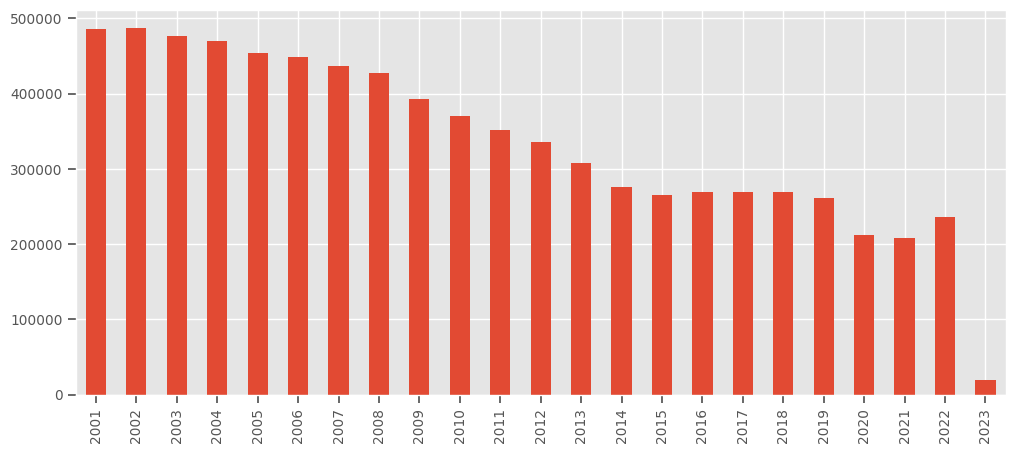

In [8]:
crime_years = df_ts.index.year.value_counts().sort_index()
crime_years.plot(kind = 'bar');

- There is an overall downward trend in crime across the years.

### Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [9]:
crime_types = df_ts['Primary Type'].unique()
crime_types

array(['THEFT', 'GAMBLING', 'CRIMINAL DAMAGE', 'BATTERY', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'OFFENSE INVOLVING CHILDREN', 'ASSAULT',
       'NARCOTICS', 'MOTOR VEHICLE THEFT', 'WEAPONS VIOLATION',
       'CRIM SEXUAL ASSAULT', 'BURGLARY', 'SEX OFFENSE',
       'PUBLIC PEACE VIOLATION', 'LIQUOR LAW VIOLATION', 'ROBBERY',
       'CRIMINAL TRESPASS', 'INTERFERENCE WITH PUBLIC OFFICER',
       'HOMICIDE', 'KIDNAPPING', 'PROSTITUTION', 'STALKING',
       'INTIMIDATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON', 'RITUALISM',
       'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION',
       'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON-CRIMINAL', 'HUMAN TRAFFICKING',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'], dtype=object)

In [18]:
yearly_crimes = {}

for crime in crime_types:
    temp = df_ts.loc[df_ts['Primary Type'] == crime].copy()
    resampled = temp.resample("A").size()
    yearly_crimes[crime] = resampled.copy()

In [19]:
yearly_crimes_df = pd.DataFrame(yearly_crimes)
yearly_crimes_df['Year'] = yearly_crimes_df.index.year
yearly_crimes_df = yearly_crimes_df.set_index('Year')
yearly_crimes_df

,THEFT,GAMBLING,CRIMINAL DAMAGE,BATTERY,OTHER OFFENSE,DECEPTIVE PRACTICE,OFFENSE INVOLVING CHILDREN,ASSAULT,NARCOTICS,MOTOR VEHICLE THEFT,...,RITUALISM,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL
Year,,,,,,,,,,,,,,,,,,,,,
2001,99275,934,55857,93459,29663,14941,2259,31384,50567,27552,...,8.00,1.00,19,6.00,9.00,1,NaN,NaN,NaN,NaN
2002,98331,971,55941,94153,32600,13729,2590,31523,51789,25121,...,2.00,NaN,26,5.00,8.00,0,NaN,NaN,NaN,NaN
2003,98876,1088,55011,88379,31147,13459,3047,29477,54288,22748,...,2.00,NaN,16,2.00,6.00,0,1.00,NaN,NaN,NaN
2004,95463,1122,53164,87136,29532,13255,3096,28850,57060,22805,...,1.00,NaN,13,9.00,9.00,0,0.00,NaN,NaN,NaN
2005,85684,1078,54548,83964,28028,13590,2903,27066,56234,22497,...,2.00,NaN,19,9.00,4.00,0,0.00,NaN,NaN,NaN
2006,86240,1368,57124,80666,27101,13606,2779,25945,55813,21818,...,7.00,NaN,17,9.00,4.00,0,0.00,NaN,NaN,NaN
2007,85156,1409,53749,79593,26863,14170,2916,26313,54454,18573,...,1.00,NaN,12,12.00,5.00,0,0.00,NaN,NaN,NaN
2008,88434,1199,52842,75926,26533,14930,2656,25449,46507,18881,...,0.00,NaN,13,12.00,4.00,0,0.00,NaN,NaN,NaN
2009,80975,991,47725,68460,25601,13874,2629,22861,43542,15482,...,0.00,NaN,21,7.00,10.00,0,1.00,NaN,NaN,NaN


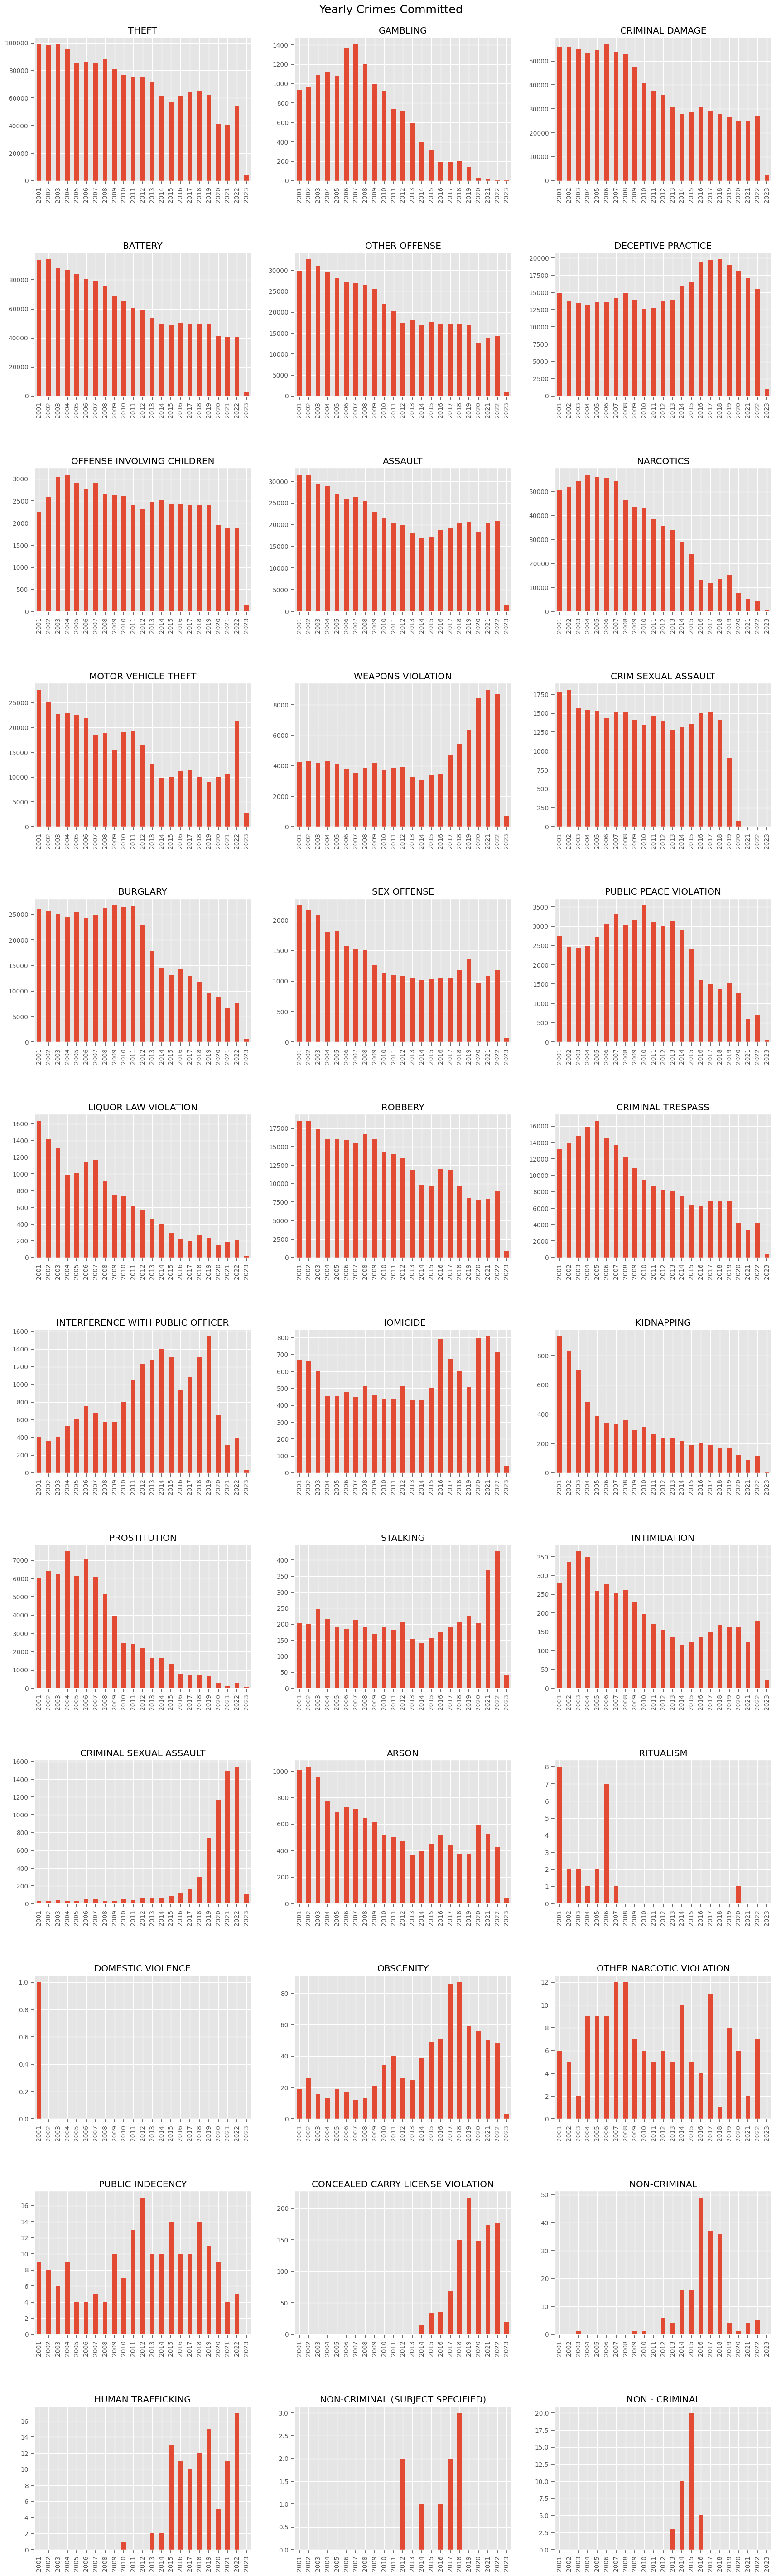

In [38]:
fig, axs = plt.subplots(nrows = 12, ncols = 3, figsize = (21,72))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Yearly Crimes Committed', fontsize = 18, y = 0.89)

for col, ax in zip(yearly_crimes_df.columns, axs.ravel()):
    yearly_crimes_df[col].plot(ax=ax, kind = 'bar')
    ax.set_title(col.upper())
    ax.set_xlabel('')

- Overall crime is decreasing.
- Certain crimes are on the upward trend even though overall crime is down.
    - Deceptive Practice, Weapons Violations, Interference with Public Officer, Homicide, Stalking, Criminal Sexual Assault, Obscenity, Public Indecency, Concealed Carry License Violation, Non-Criminal, and Human Trafficking. 
- Motor Vehicle Theft is also on a recent upwards climb that will require monitoring. 

## Q4. Comparing Months:

### What months have the most crime? What months have the least?

In [10]:
monthly_crimes = df_ts.groupby(df_ts.index.month_name()).count()
monthly_crimes

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Datetime,,,,,,,,,,,
April,626930,626930,626930,626139,626930,626930,626930,626930,561018,620803,620803
August,710104,710104,710104,709288,710104,710104,710104,710100,666360,703086,703086
December,579236,579236,579236,578470,579236,579236,579236,579235,542941,569836,569836
February,529210,529210,529210,528484,529210,529210,529210,529210,462628,523163,523163
January,619884,619884,619884,618825,619884,619884,619884,619883,545192,610422,610422
July,716951,716951,716951,716085,716951,716951,716951,716949,672541,710548,710548
June,681462,681462,681462,680629,681462,681462,681462,681461,640025,675152,675152
March,629488,629488,629488,628655,629488,629488,629488,629488,552207,623238,623238
May,682702,682702,682702,681911,682702,682702,682702,682701,641084,677685,677685


In [11]:
monthly_crimes['Primary Type'].idxmax()

'July'

In [12]:
monthly_crimes['Primary Type'].idxmin()

'February'

- July has the most crimes committed since 2001.
- February has the fewest crimes committed since 2001. 

### Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [58]:
monthly_crimes = {}

for crime in crime_types:
    temp = df_ts.loc[df_ts['Primary Type'] == crime].copy()
    resampled = temp.resample('M').size()
    monthly_crimes[crime] = resampled.copy()

In [60]:
monthly_crimes_df = pd.DataFrame(monthly_crimes)
monthly_crimes_df['Month'] = monthly_crimes_df.index.month
monthly_crimes_df = monthly_crimes_df.set_index('Month')

In [65]:
monthly_crimes_df = monthly_crimes_df.groupby(monthly_crimes_df.index).sum().sort_index()
monthly_crimes_df

,THEFT,GAMBLING,CRIMINAL DAMAGE,BATTERY,OTHER OFFENSE,DECEPTIVE PRACTICE,OFFENSE INVOLVING CHILDREN,ASSAULT,NARCOTICS,MOTOR VEHICLE THEFT,...,RITUALISM,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL
Month,,,,,,,,,,,,,,,,,,,,,
1,127251,361,64847,104247,43241,31134,6293,36382,66347,32906,...,3.00,1.00,76,8.00,8.00,82.00,11.00,15.00,1.00,2.00
2,104941,389,55426,93592,38562,25315,3974,33416,63888,25125,...,1.00,0.00,53,13.00,15.00,69.00,12.00,9.00,2.00,5.00
3,123721,744,71870,117867,43236,28557,4607,41708,69079,28734,...,3.00,0.00,87,12.00,9.00,77.00,12.00,10.00,1.00,0.00
4,125632,1238,75102,118492,41611,27582,4427,42028,62946,27910,...,1.00,0.00,51,9.00,13.00,78.00,11.00,3.00,1.00,1.00
5,137494,1637,79683,135673,42185,27452,4864,48453,63125,29631,...,1.00,0.00,72,18.00,22.00,96.00,12.00,5.00,0.00,4.00
6,143394,1874,78916,135900,40646,28166,4767,47250,58924,30415,...,0.00,0.00,65,9.00,22.00,92.00,14.00,10.00,0.00,9.00
7,159046,1964,83393,136809,41516,28455,4523,47899,61849,32663,...,1.00,0.00,72,17.00,13.00,95.00,17.00,8.00,1.00,2.00
8,158922,2219,81706,128724,41056,29074,4567,46453,64308,32721,...,3.00,0.00,52,18.00,25.00,96.00,18.00,9.00,1.00,5.00
9,145582,1799,75465,122331,37144,27786,4394,45417,60844,31706,...,3.00,0.00,68,14.00,19.00,118.00,17.00,15.00,1.00,5.00


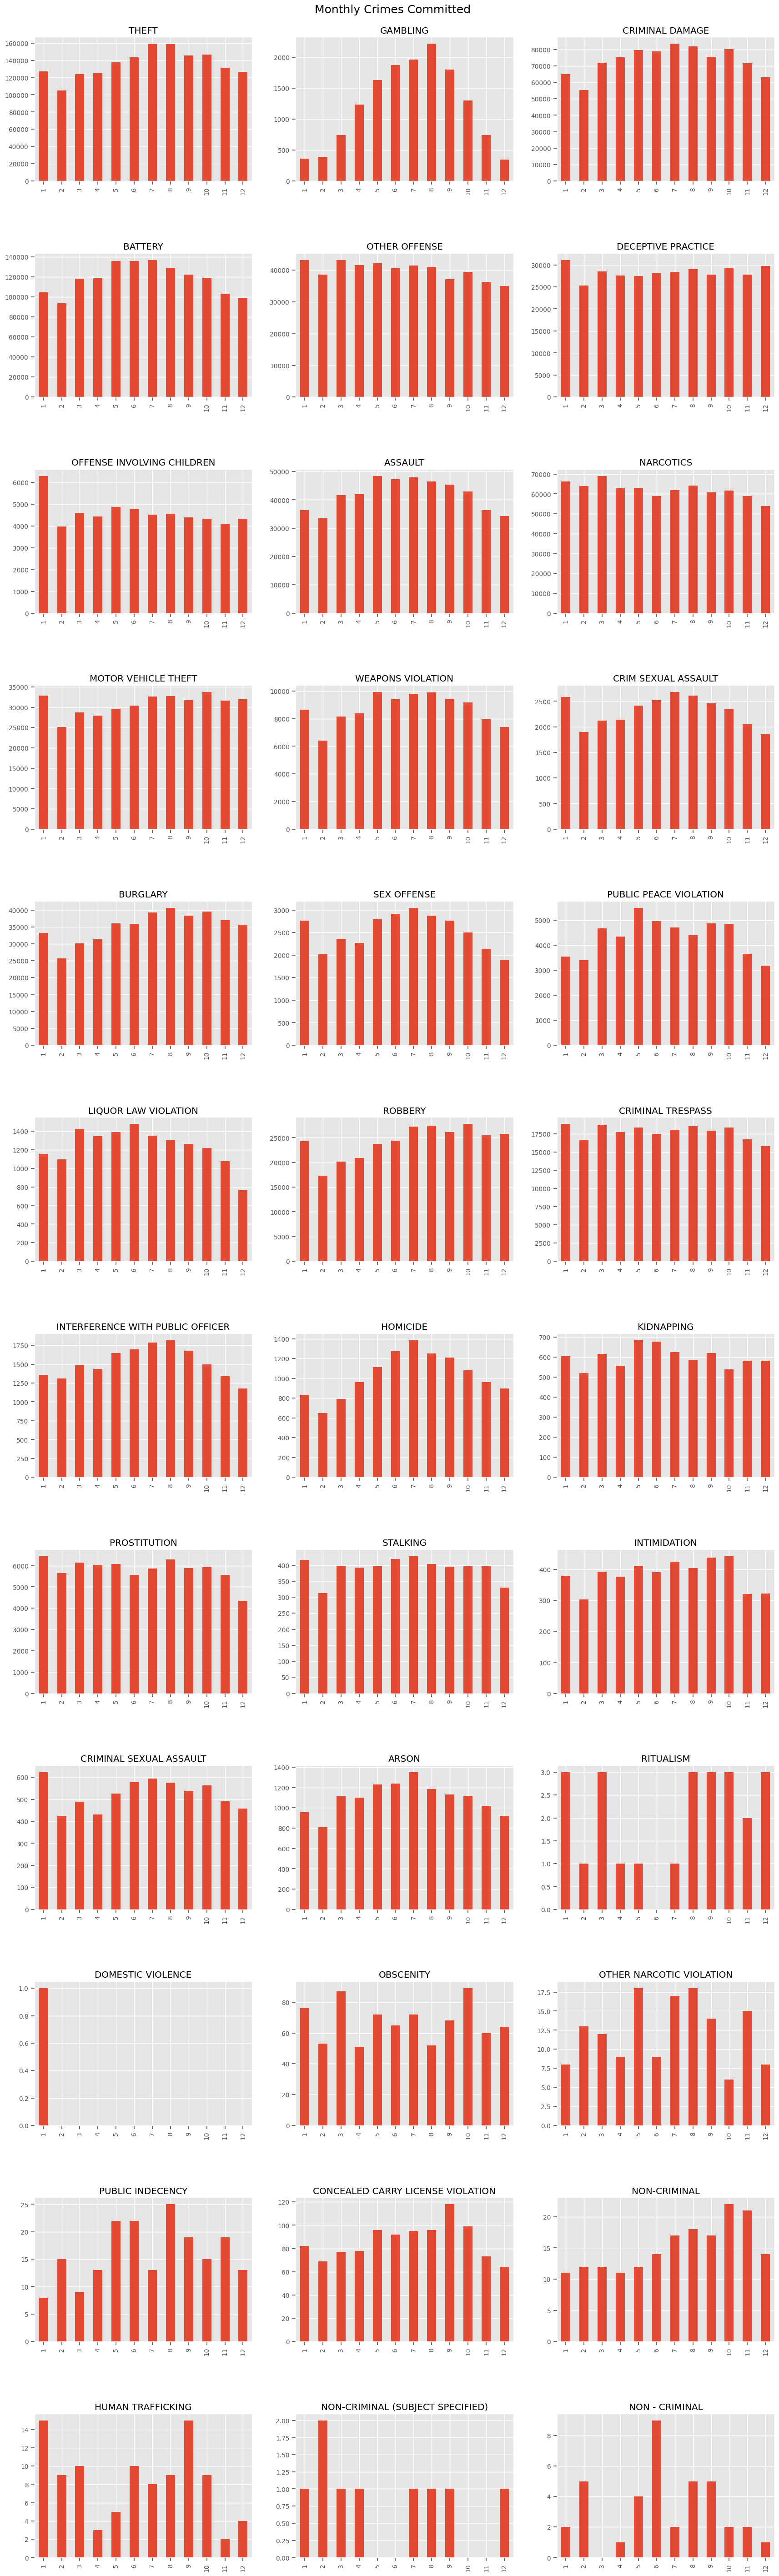

In [66]:
fig, axs = plt.subplots(nrows = 12, ncols = 3, figsize = (21,72))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Monthly Crimes Committed', fontsize = 18, y = 0.89)

for col, ax in zip(yearly_crimes_df.columns, axs.ravel()):
    monthly_crimes_df[col].plot(ax=ax, kind = 'bar')
    ax.set_title(col.upper())
    ax.set_xlabel('')

- All crimes generally follow the overall distribution.
- Battery and Assault are highest in May through July
- Deceptive Practice, Prostitution, and Offense involving Children are highest in January
- Narcotics has a downtrend through the year
- Kidnapping is highest in May and June